##### Sami Ramzi Chibane © 

# L'anayse des réseaux routiers avec "Momepy"

##### Dans ce carnet, nous allons nous intéresser à La Rochelle, en France. Nous récupérons son réseau "pédestre" depuis OSM à l'aide du package OSMnx et le convertissons ensuite en GeoDataFrame

In [4]:
import geopandas as gpd
import momepy
import osmnx as ox
import matplotlib.pyplot as plt

In [5]:
streets_graph = ox.graph_from_place('La Rochelle, France', network_type='walk')
streets_graph = ox.projection.project_graph(streets_graph)

streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\osmnx\utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


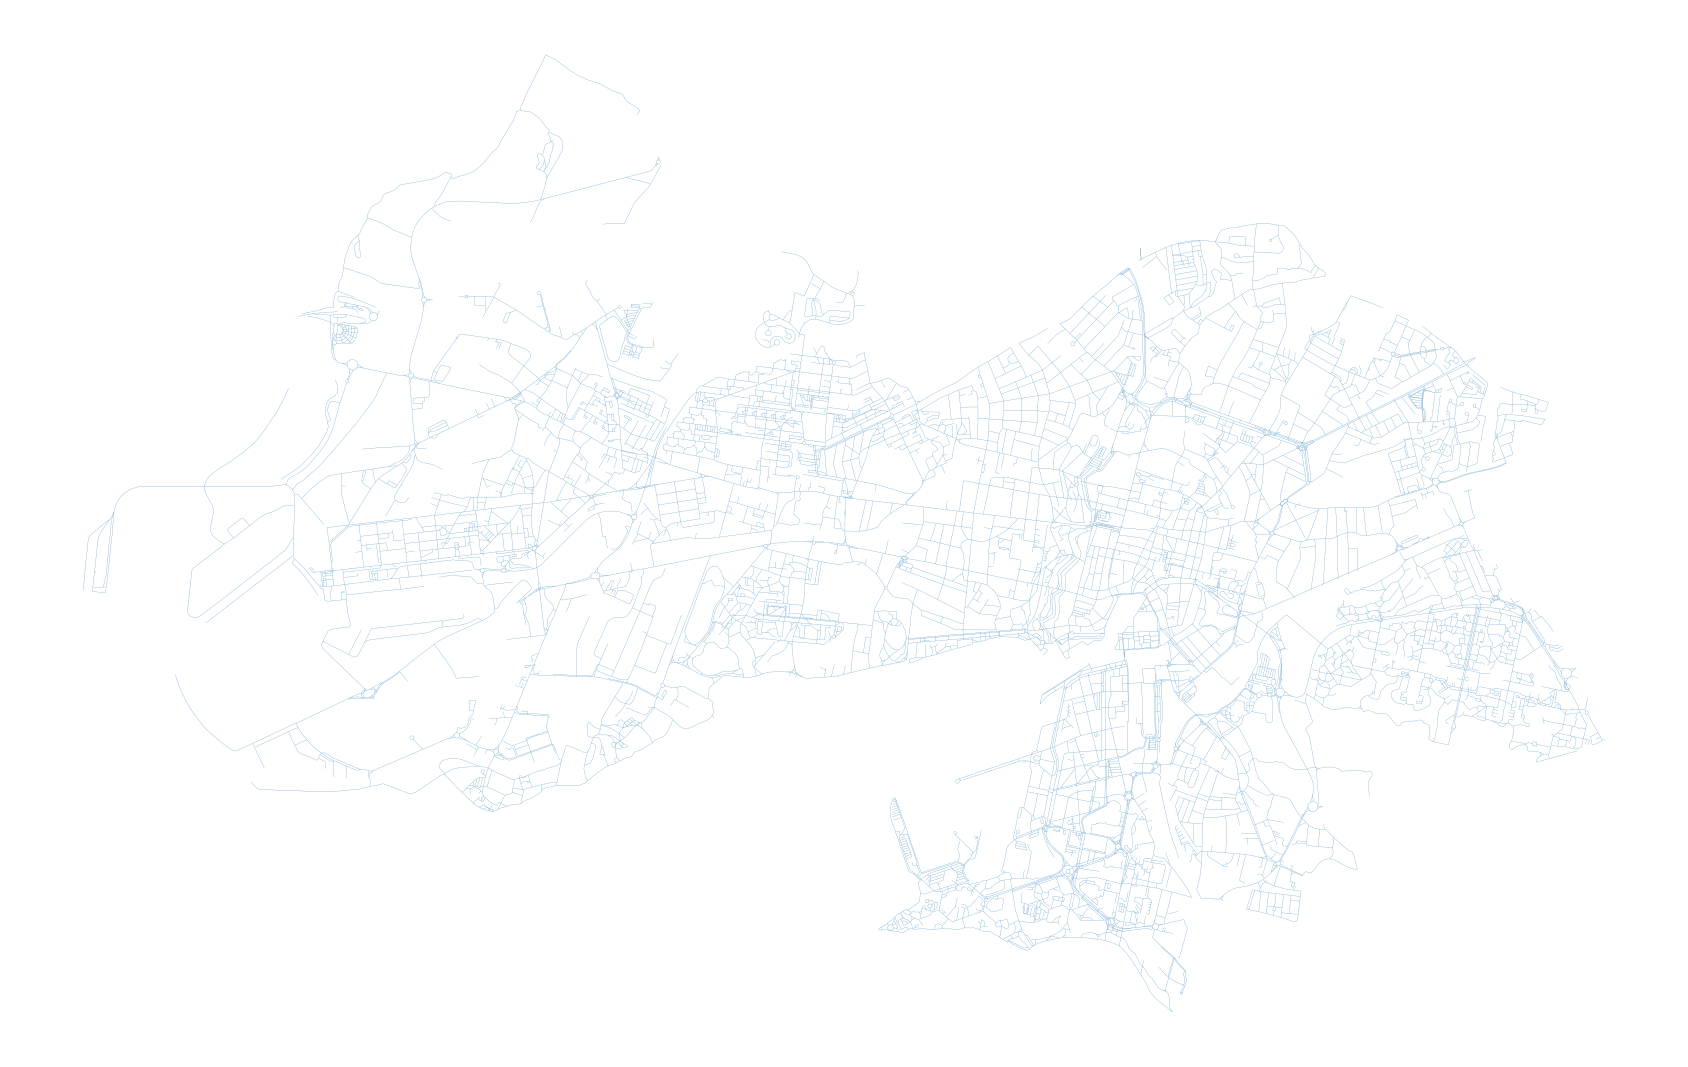

In [9]:
f, ax = plt.subplots(figsize=(30, 30))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

##### Nous pouvons générer un networkX.MultiGraph, qui est utilisé dans momepy pour l'analyse de réseau, en utilisant gdf_to_nx.

In [11]:
graph = momepy.gdf_to_nx(streets)

##### Analyse basée sur les nœuds

##### Parmi les fonctions de momepy, nous avons celle mesurant le regroupement "clustering"

In [12]:
graph = momepy.clustering(graph, name='clustering')

##### Momepy inclut des caractères locaux mesurés sur le réseau dans un certain rayon de chaque nœud, comme le maillage. La fonction générera "ego_graph" pour chaque nœud afin que cela puisse prendre un certain temps pour des réseaux plus étendus. Le rayon peut être défini topologiquement

In [13]:
graph = momepy.meshedness(graph, radius=5, name='meshedness')

  0%|          | 0/7950 [00:00<?, ?it/s]

##### Ou métriquement, en utilisant la distance qui a été enregistrée comme argument de bord par "gdf_to_nx" (ou tout autre poids).

In [14]:
graph = momepy.meshedness(graph, radius=400, name='meshedness400',
                          distance='mm_len')

  0%|          | 0/7950 [00:00<?, ?it/s]

##### Une fois que nous avons terminé l'analyse basée sur les graphiques, nous pouvons revenir à GeoPandas. Dans ce cahier, nous nous intéressons uniquement aux nœuds :

In [15]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

##### Nous pouvons maintenant tracer nos résultats de manière standard ou les lier à d'autres éléments (en utilisant get_node_id).

###### Regroupement "Clustering" :

C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Chibane\anaconda3\envs\ox\lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


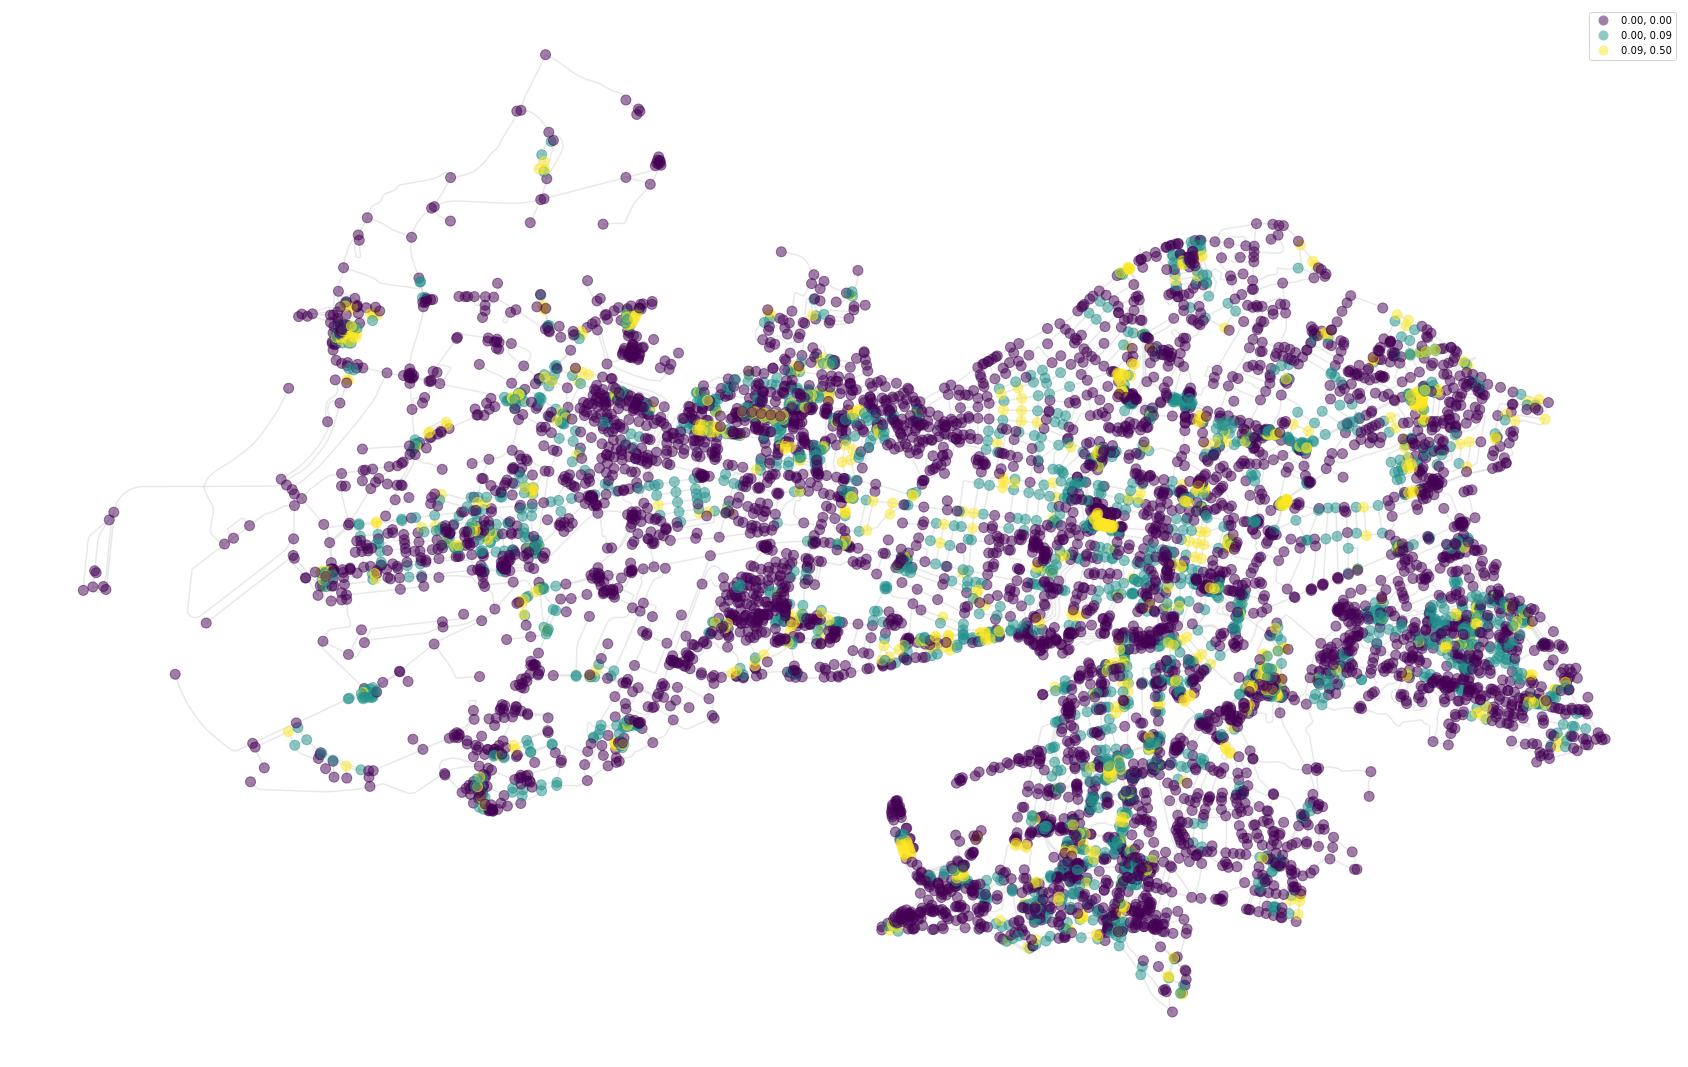

In [17]:
f, ax = plt.subplots(figsize=(30, 30))
nodes.plot(ax=ax, column='clustering', markersize=100, legend=True, cmap='viridis',
           scheme='quantiles', alpha=0.5, zorder=2)
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

##### Maillage basé sur la distance topologique :

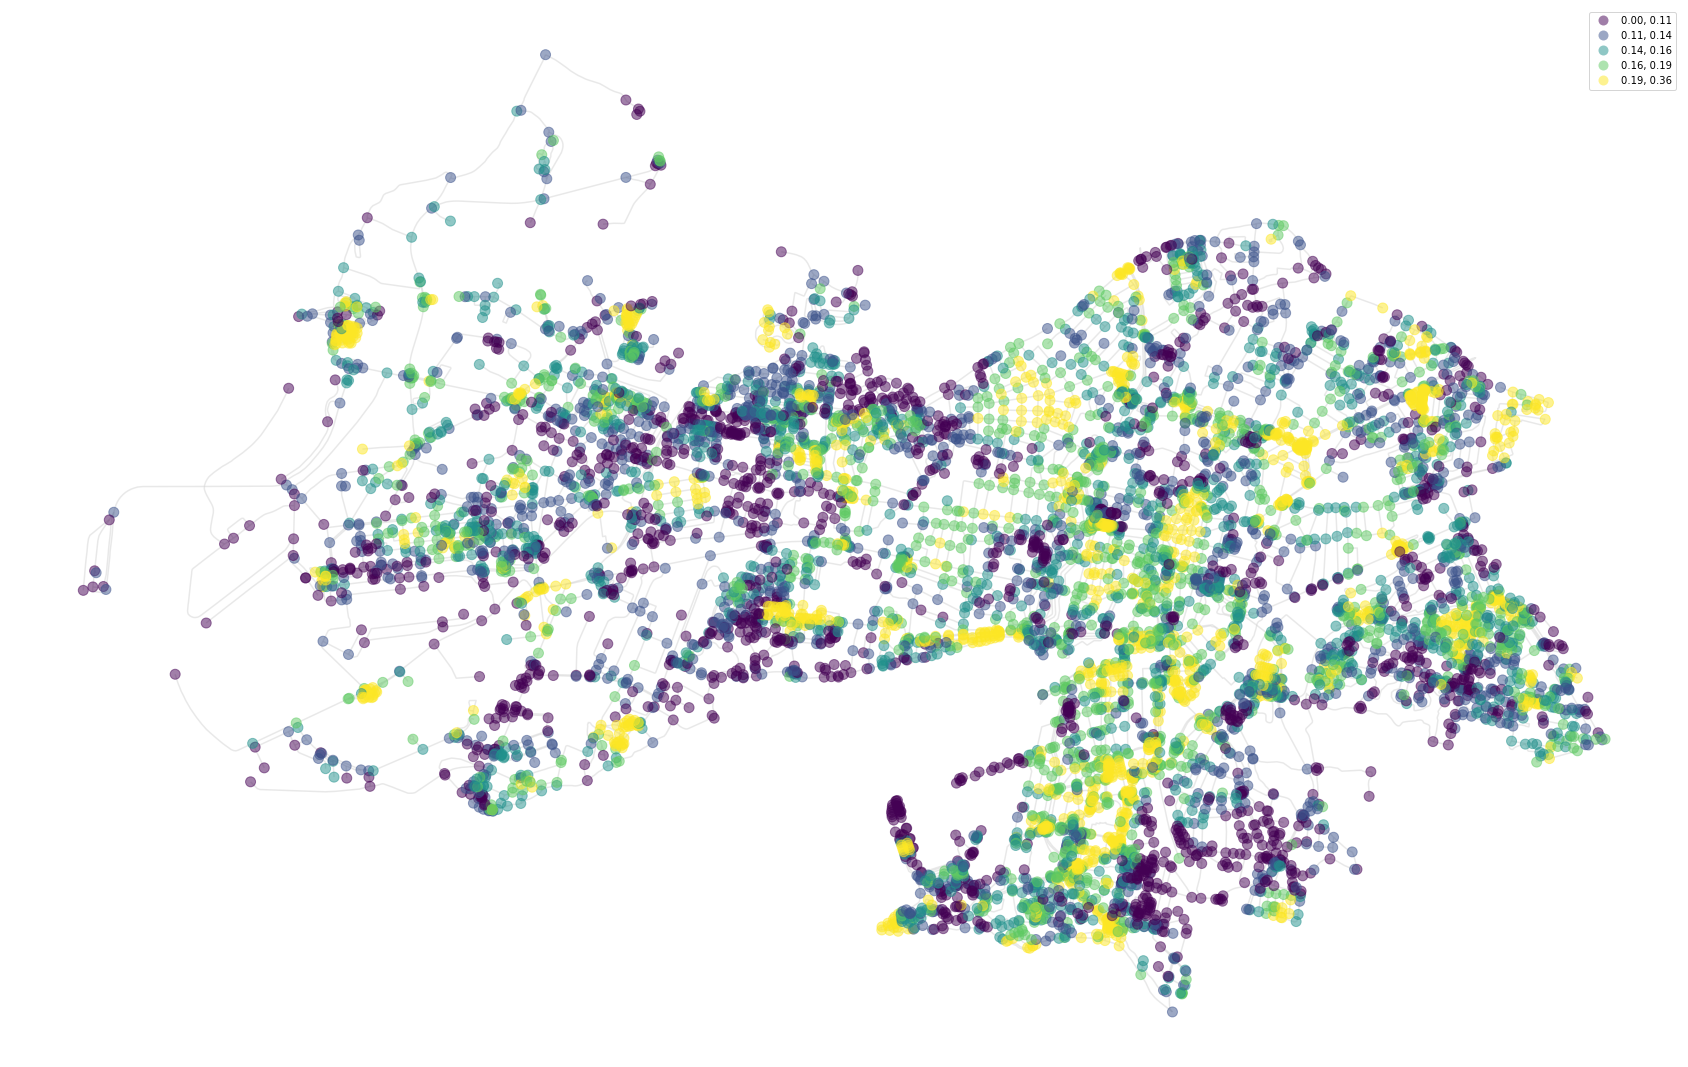

In [19]:
f, ax = plt.subplots(figsize=(30, 30))
nodes.plot(ax=ax, column='meshedness', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()

##### Et maillage basé sur 400 mètres :

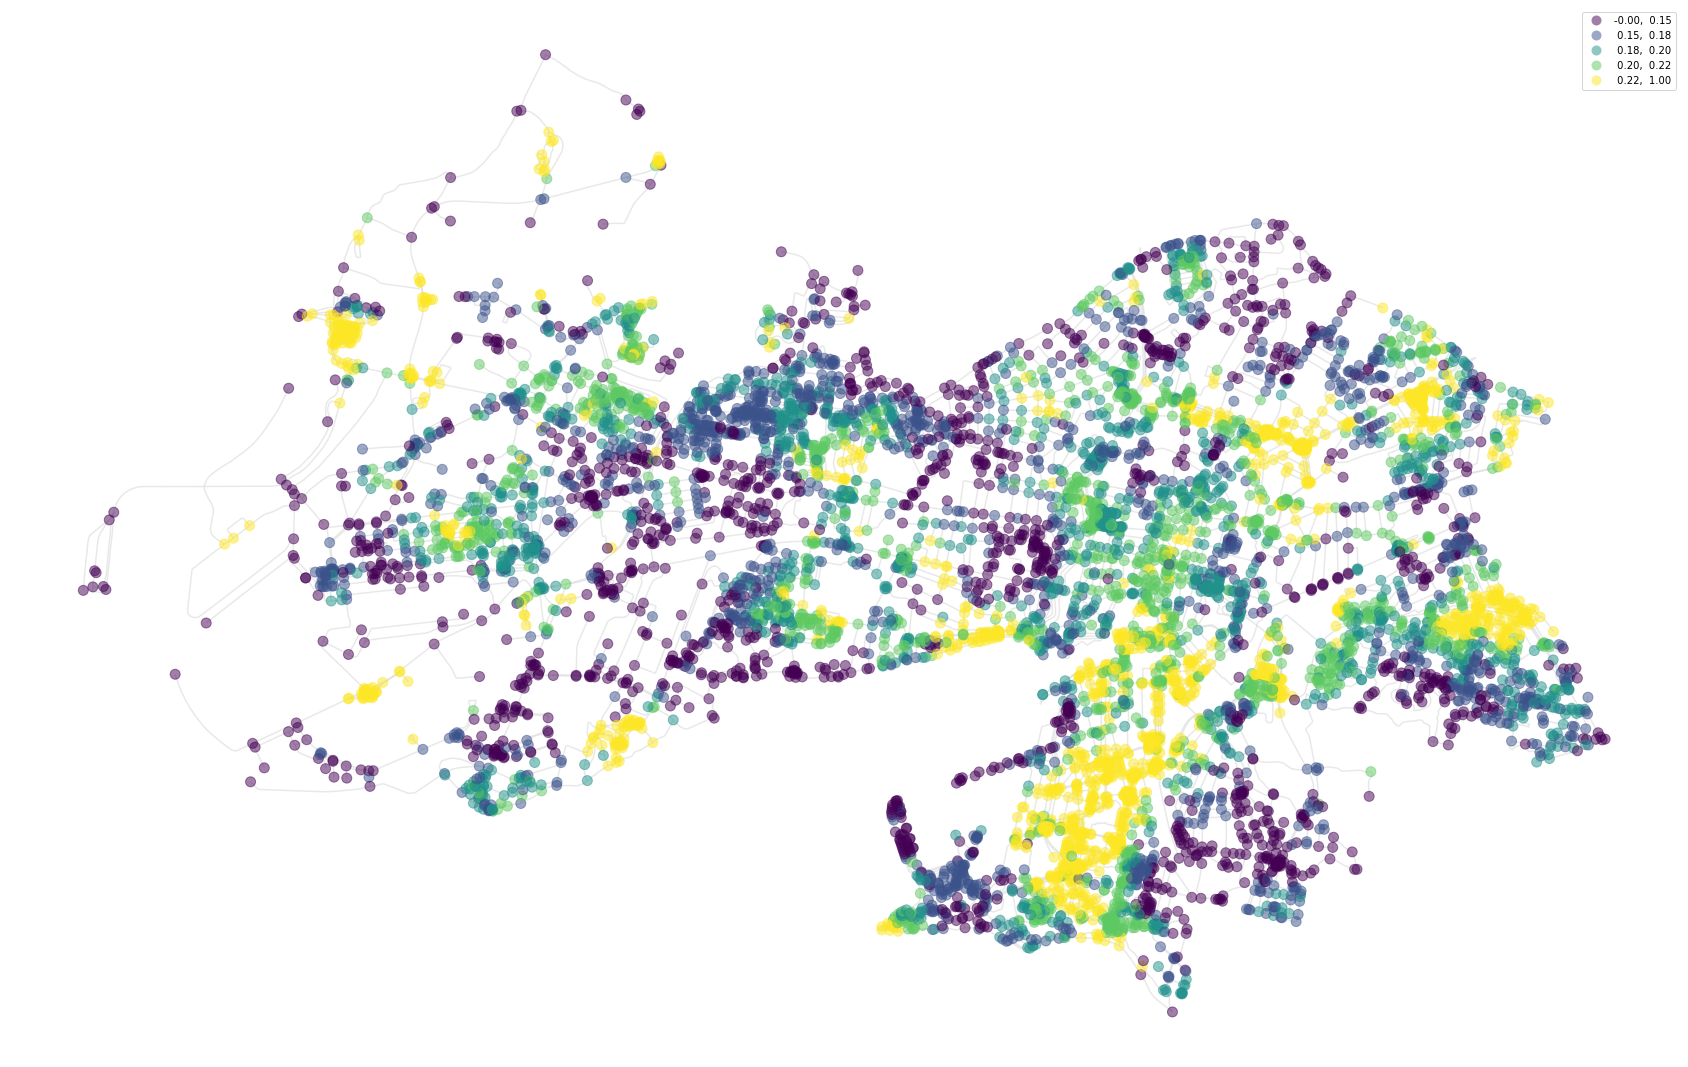

In [25]:
f, ax = plt.subplots(figsize=(30, 30))
nodes.plot(ax=ax, column='meshedness400', markersize=100, legend=True, cmap='viridis',
           alpha=0.5, zorder=2, scheme='quantiles')
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()